In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
from scipy import stats
import statsmodels.api as sm

In [3]:
# constants
fn_fe_linear = '../data/freeEration_16to50_T0to2_TmuF.csv'
fn_fe_log = '../data/freeEration_16to50_T0to2_log.csv'
size2plot = [20]
labels = ["k="+str(x) for x in size2plot]
Tind1 = 1
Tind2 = 1
fe_linear =np.loadtxt(fn_fe_linear, delimiter=',')
fe_log =np.loadtxt(fn_fe_log, delimiter=',')

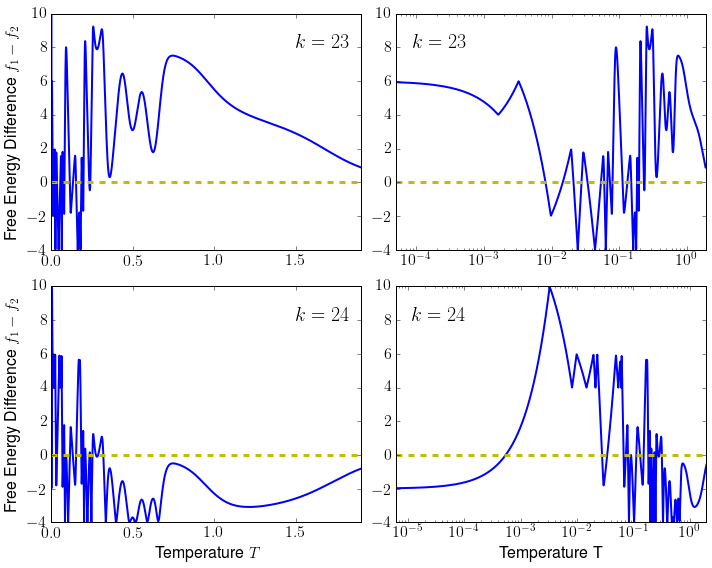

In [14]:
# Linear spaced T data
lw = 2
fs = 16
fslabel=14
size2plot = [23]
ind = np.array([x in size2plot for x in fe_linear[0, :]])
labels = ["k="+str(x) for x in size2plot]
plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.plot(fe_linear[:, Tind1], fe_linear[:, ind], linewidth=lw)
plt.xlim([min(fe_linear[:, Tind1]), 1.9])
plt.ylim([np.min(fe_linear[:, ind]), 10])
plt.axhline(y=0.0, xmin=0, xmax=1, linewidth=3, color = 'y', ls='--')
plt.tick_params(labelsize=fs)
#plt.xlabel("Temperature T", fontsize=16)
plt.ylabel("Free Energy Difference $f_1-f_2$", fontsize=16)
#plt.legend(labels, loc='lower right')
plt.text(1.5, 8.0,  "$k="+str(size2plot[0])+'$', fontsize=fs+4)
#plt.title("linear-spaced T in calculation", fontsize=15)

plt.subplot(222)
plt.semilogx(fe_linear[:, Tind1], fe_linear[:, ind], linewidth=lw)
plt.axhline(y=0.0, xmin=0, xmax=1, linewidth=3, color = 'y', ls='--')
plt.xlim([min(fe_linear[:, Tind1]), 1.9])
plt.ylim([np.min(fe_linear[:, ind]), 10])
plt.tick_params(labelsize=fs)
plt.text(0.9e-4, 8.0,  "$k="+str(size2plot[0])+'$', fontsize=fs+4)
#plt.xlabel("Temperature T", fontsize=16)
#plt.ylabel("Free Energy Difference", fontsize=16)
#plt.legend(labels, loc='lower left')
#plt.title("linear-spaced T in calculation", fontsize=15)
#plt.savefig("NcVST_k20.pdf")

size2plot=[24]
ind = np.array([x in size2plot for x in fe_log[0, :]])
labels = ["k="+str(x) for x in size2plot]
plt.subplot(223)
plt.plot(fe_log[:, Tind2], fe_log[:, ind], linewidth=lw)
plt.xlim([min(fe_log[:, Tind2]), 1.9])
plt.ylim([np.min(fe_log[:, ind]), 10])
plt.tick_params(labelsize=fs)
plt.xlabel("Temperature $T$", fontsize=16)
plt.ylabel("Free Energy Difference $f_1-f_2$", fontsize=16)
plt.axhline(y=0.0, xmin=0, xmax=1, linewidth=3, color = 'y', ls='--')
plt.text(1.5, 8.0, "$k="+str(size2plot[0])+'$', fontsize=fs+4)
#plt.legend(labels, loc='lower right')
#plt.title("linear-spaced T in calculation", fontsize=15)

plt.subplot(224)
plt.semilogx(fe_log[:, Tind2], fe_log[:, ind], linewidth=lw)
plt.xlim([min(fe_log[:, Tind2]), 1.9])
plt.ylim([np.min(fe_log[:, ind]), 10])
plt.tick_params(labelsize=fs)
plt.xlabel("Temperature T", fontsize=16)
plt.axhline(y=0.0, xmin=0, xmax=1, linewidth=3, color = 'y', ls='--')
plt.text(1.2e-5, 8.0,  "$k="+str(size2plot[0])+'$', fontsize=fs+4)
#plt.ylabel("Free Energy Difference", fontsize=16)
#plt.legend(labels, loc='lower left')
plt.tight_layout()
#plt.savefig("freeEdifference_k16_32.pdf")

In [16]:
crossfns = ['NcKs_16to50_T01to03_TmuF.csv', 'NcKs_16to50_T01to03_TmuF.csv', 
            'NcKs_16to50_T01to03_log.csv', 'NcKs_16to50_T0to2_log.csv', 'NcKs_16to50_T0to2_p2.csv']
crossfns = ['../data/'+fn for fn in crossfns]
data = {}
for fn in crossfns:
    data[fn] = np.loadtxt(fn, delimiter=',')

In [60]:
for fn in data:
    dt = data[fn]
    y = np.log(dt[:, 1])
    x = dt[:, 0]
    x=sm.add_constant(x, prepend=False)

    model=sm.OLS(y,x)
    result=model.fit()
    print "######################"
    print result.summary()

######################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 02 Sep 2016   Prob (F-statistic):                nan
Time:                        10:12:08   Log-Likelihood:                    nan
No. Observations:                  35   AIC:                               nan
Df Residuals:                      33   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1                inf        

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1150.
Date:                Fri, 02 Sep 2016   Prob (F-statistic):           3.15e-27
Time:                        17:12:38   Log-Likelihood:                -25.509
No. Observations:                  35   AIC:                             55.02
Df Residuals:                      33   BIC:                             58.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2931      0.009     33.906      0.0

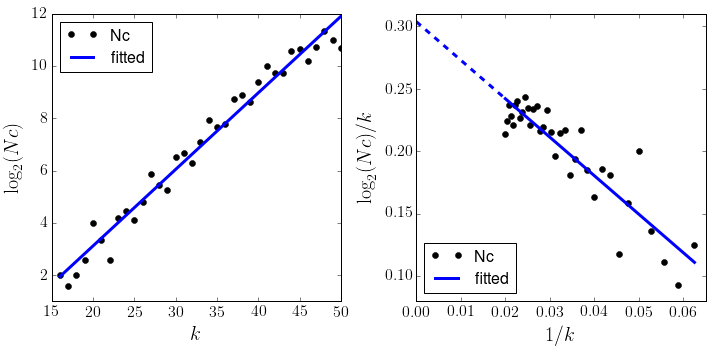

In [6]:
ms=6
lw=3
fs = 16

dt = data[crossfns[-1]]
y = np.log2(dt[:, 1])
x = dt[:, 0]
x=sm.add_constant(x, prepend=False)

model=sm.OLS(y,x)
result=model.fit()

plt.figure(figsize=(10,5))
plt.subplot(121)
x = dt[:, 0]
yp = result.predict()
print result.summary()
plt.plot(x, y, 'ok', markersize=ms, label='Nc')
plt.plot(x, yp, '-b', linewidth=lw, label='fitted')
plt.tick_params(labelsize=fs)
plt.xlabel("$k$", fontsize=fs+4)
plt.ylabel("$\log_2(Nc)$", fontsize=fs+4)
plt.ylim([1, 12])
plt.legend(loc='upper left', fontsize=fs)

####### another way 
y = np.log2(dt[:, 1])
x = dt[:, 0]
y = y/x
x = 1./x
x=sm.add_constant(x, prepend=False)
model=sm.OLS(y,x)
result=model.fit()

plt.subplot(122)
pltx = x[:, 0]
plty = y
pltyp = result.predict()
print result.summary()
plt.plot(pltx, plty, 'ok', markersize=ms, label='Nc')
plt.plot(pltx, pltyp, '-b', linewidth=lw, label='fitted')
x_extra = np.linspace(0.0, 0.02, 10)
x_extra=sm.add_constant(x_extra, prepend=False)
plt.plot(x_extra[:, 0],result.predict(x_extra), '--b', linewidth=lw )
plt.tick_params(labelsize=fs)
plt.xlabel("$1/k$", fontsize=fs+4)
plt.ylabel("$\log_2(Nc)/k$", fontsize=fs+4)
plt.xlim([0, 0.065])
plt.ylim([0.08, 0.31])
plt.legend(loc='lower left', fontsize=fs)
plt.tight_layout()
plt.savefig('chaotic_exponents_freeE.pdf')

In [7]:
# plot of free energies at PP & PM from low T to high T
files = ['freeEration_16to32_T0to10_TmuF_manual_Fdiff.csv', 
        'freeEration_16to32_T0to10_TmuF_auto_Fdiff.csv']
files = ['../data/'+f for f in files]

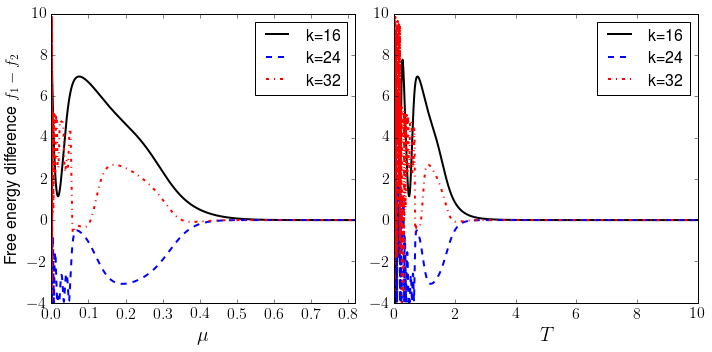

In [18]:
fn = files[0]
data = np.loadtxt(fn, delimiter=',')
lw = 2.
fs = 16

inds = [2, 10, -1]
styles = ['k-', '--b', '-.r']
plt.figure(figsize=(10, 5))
for i in range(len(inds)):
    sty = styles[i]
    ind = inds[i]
    plt.subplot(121)
    x = data[1:, 0]
    y = data[1:, ind]
    plt.plot(x, y, sty, linewidth=lw, label='k='+str(int(data[0, ind])))
    plt.subplot(122)
    x = data[1:, 1]
    y = data[1:, ind]
    plt.plot(x, y, sty, linewidth=lw, label='k='+str(int(data[0, ind])))
    
plt.subplot(121)
plt.tick_params(labelsize=fs)
plt.xlim([0, 0.82])
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel('$\mu$', fontsize=fs+4)
plt.ylabel('Free energy difference $f_1 - f_2$', fontsize=fs)

plt.subplot(122)
plt.tick_params(labelsize=fs)
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel('$T$', fontsize=fs+4)
plt.tight_layout()
plt.savefig('freeE_lowT2highT.pdf')

## Moving average fitting

In [15]:
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

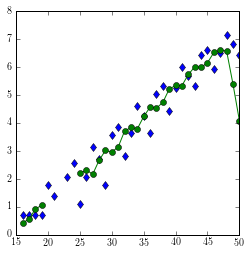

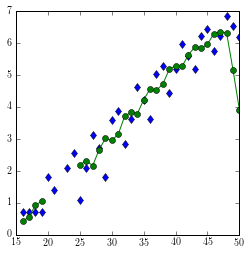

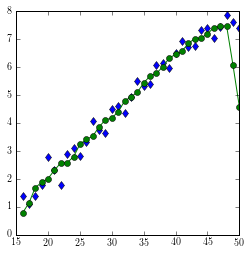

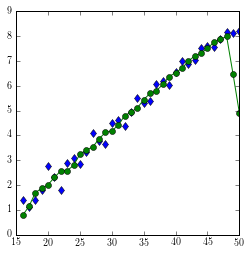

In [27]:
for fn in data:
    dt = data[fn]
    last = -10
    y = np.log(dt[:, 1])
    x = dt[:, 0]
    plt.figure(figsize=(4,4))
    plt.plot(x, y, 'd')
    y2 = movingaverage(y, 5)
    plt.plot(x, y2, '-o')